In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.style as style
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score


In [12]:
csv_file_path = 'C:\\Users\\Innocent\\Downloads\\Building Energy Efficiency.csv'
df = pd.read_csv(csv_file_path)

In [13]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.6400,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.6200,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.6200,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.6200,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [14]:
df.shape

(768, 10)

In [15]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

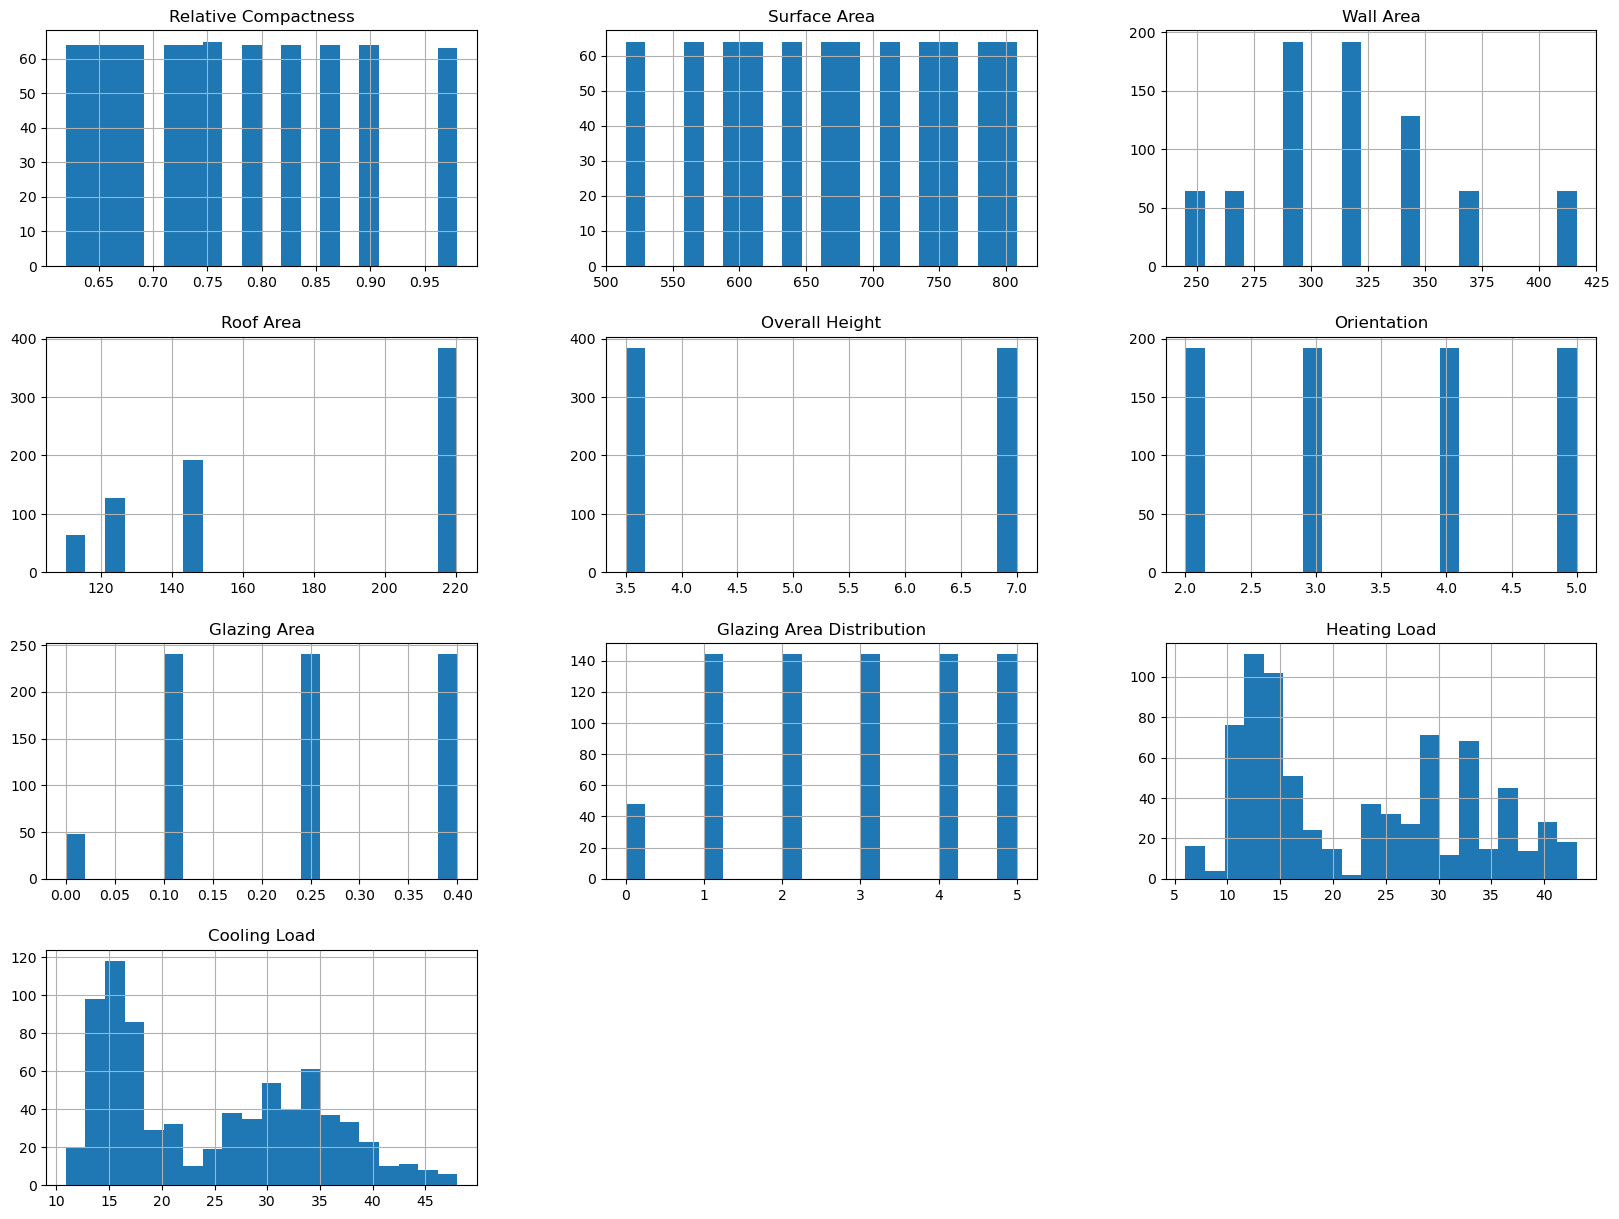

In [16]:
df.hist(bins=20, figsize=(20,15))
plt.show()

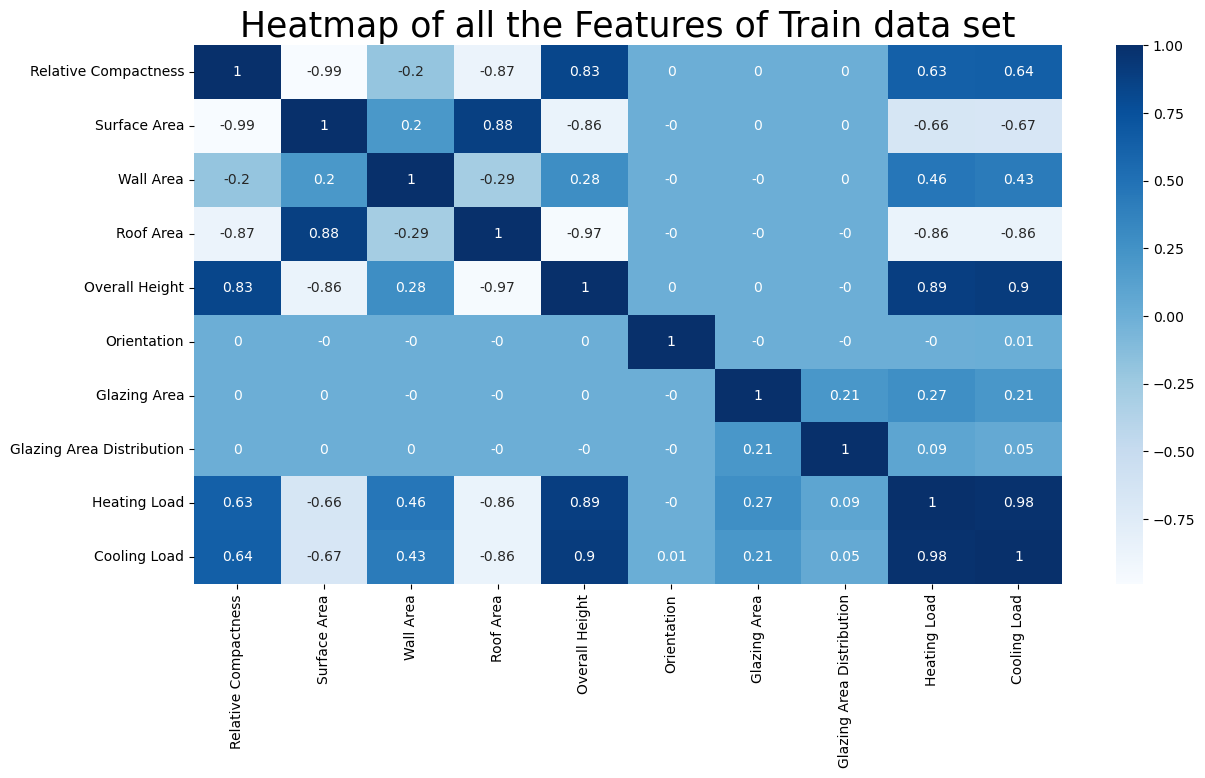

In [17]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues');
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

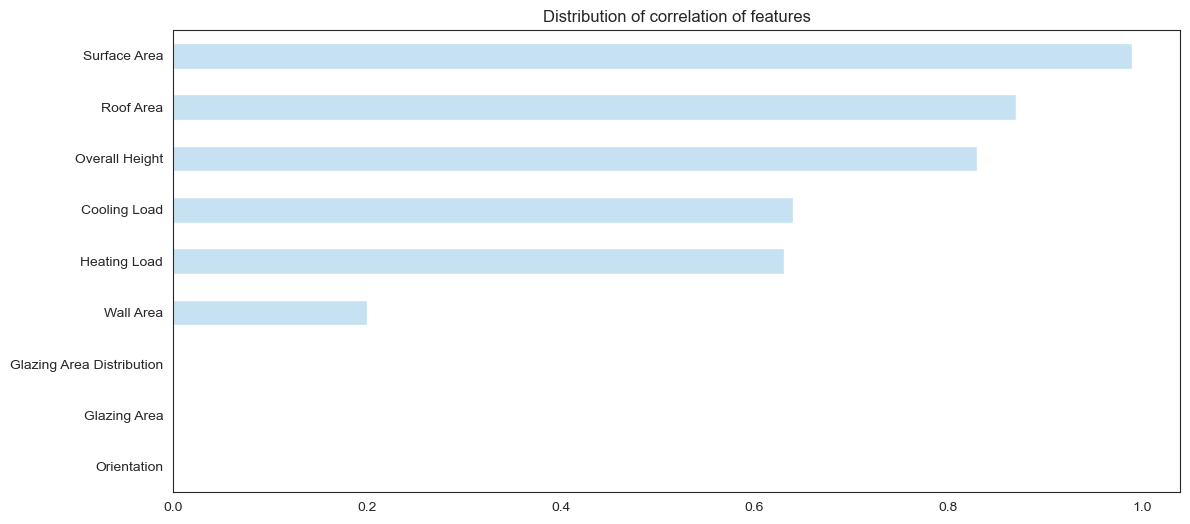

In [25]:
sns.set_style('white')
sns.set_palette('cubehelix_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['Relative Compactness']).sort_values()[:-1].plot.barh()
plt.show()

In [18]:
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y = df[['Heating Load', 'Cooling Load']]
Y1= df[['Heating Load']]
Y2= df[['Cooling Load']]

In [19]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [38]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

 # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [21]:
X_train

array([[0.66666667, 0.25      , 0.28571429, ..., 1.        , 0.25      ,
        1.        ],
       [0.55555556, 0.33333333, 0.42857143, ..., 1.        , 0.25      ,
        0.2       ],
       [0.25      , 0.66666667, 0.14285714, ..., 0.33333333, 0.625     ,
        0.2       ],
       ...,
       [0.25      , 0.66666667, 0.14285714, ..., 1.        , 0.25      ,
        1.        ],
       [0.05555556, 0.91666667, 0.57142857, ..., 0.66666667, 0.625     ,
        0.8       ],
       [0.47222222, 0.41666667, 0.57142857, ..., 1.        , 0.625     ,
        0.4       ]])

In [22]:
Acc = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [23]:
regressors = [['SVR',SVR()],
              
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()]]

In [24]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,SVR,0.930662,0.910593,0.892578,0.887385
2,KNeighborsRegressor,0.946171,0.903917,0.927201,0.889384
1,DecisionTreeRegressor,1.000000,0.997340,1.000000,0.950264


# Recommmedation

Improving energy efficiency in a building involves optimizing various factors such as surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution, heating load, and cooling load. Here are some recommendations for each aspect:

1. Surface Area:
- Minimize External Surface Area: Design the building with a compact shape to reduce the external surface area, which helps in minimizing heat loss or gain.

2. Wall Area:
- High Thermal Insulation: Use high-quality insulation materials for walls to reduce heat transfer through the building envelope.
- Optimal Window-to-Wall Ratio: Limit the amount of window area to minimize heat loss or gain. Balance natural light and energy efficiency.

3. Roof Area:
- Cool Roofing: Choose reflective roofing materials to reduce heat absorption and minimize the cooling load.
- Insulation: Insulate the roof adequately to prevent heat transfer between the interior and exterior.

4. Overall Height:
- Low-rise Design: In general, lower buildings have less surface area, reducing the overall energy requirements.

5. Orientation:
- Passive Solar Design: Align the building to maximize or minimize exposure to the sun, depending on the climate. Use passive solar design principles to optimize natural heating and cooling.

6. Glazing Area:
- High-Performance Windows: Invest in energy-efficient windows with low U-values and high solar heat gain coefficients (SHGC) to minimize heat loss and gain.
- Use of Double Glazing: Double or triple glazing can enhance insulation properties and reduce heat transfer.

7. Glazing Area Distribution:
- Strategic Placement: Concentrate windows on the south side for passive solar heating while minimizing exposure on the east and west sides to control heat gain.

8. Heating Load:
- Efficient Heating Systems: Use high-efficiency heating systems, such as condensing boilers or heat pumps, to reduce energy consumption.
- Zoning: Implement zoning systems to heat only occupied spaces, optimizing energy use.

9. Cooling Load:
- Shading: Use external shading devices like awnings, shades, or vegetation to reduce direct sunlight and control cooling loads.
- Natural Ventilation: Incorporate natural ventilation strategies to minimize the need for mechanical cooling.
